## Loading and reading the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset
leads_df=pd.read_csv("C:\\Users\\soura\\Downloads\\Leads.csv")

In [4]:
#Checking the data
pd.set_option('display.max_columns', None)
leads_df.head()


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
#Checking the df shape
leads_df.shape

(9240, 37)

In [6]:
#Checking df info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# EDA

### Removing Nulls from data

The dataframe has columns with the value "Select" in them , which means that the leads haven't selected anything from the dropdown and can be replaced with nulls

In [7]:
#Replacing "Select" with Null
leads_df.replace(["Select","select"],np.NaN,inplace=True)

In [8]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Checking the percentage of null values in columns
null_perc= leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)
null_perc

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [10]:
#Dropping columns with >40% null values
null_cols=null_perc[null_perc>=0.4].index
leads_df=leads_df.drop(null_cols,axis=1)

In [11]:
#Checking null values after dropping the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)

City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Prospect ID                                      0.000000
Newspaper                                        0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
I agree to pay the amount through cheque         0.000000
A free copy of

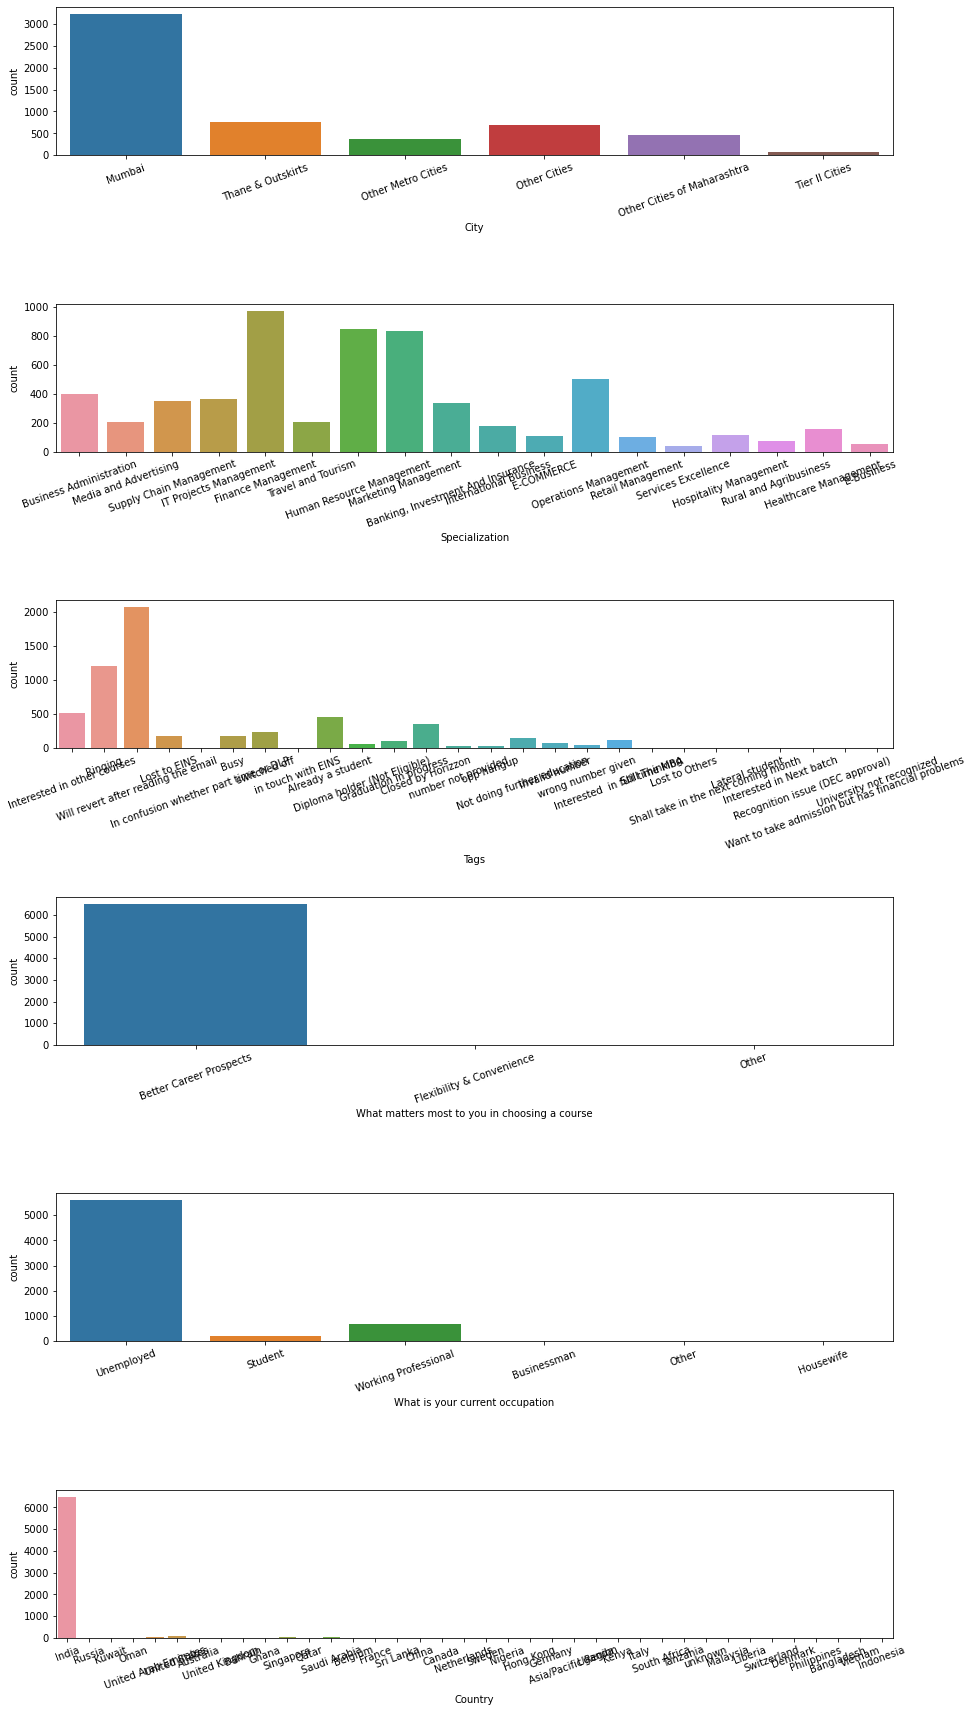

In [12]:
#Checking the columns with high null values
high_null_cols=["City","Specialization","Tags","What matters most to you in choosing a course","What is your current occupation","Country"]
plt.figure(figsize=[15,30])
x=1
plt.subplots_adjust(hspace=1)
for i in high_null_cols:
    plt.subplot(6,1,x)
    sns.countplot(data=leads_df,x=i)
    plt.xticks(rotation='20')
    x=x+1
plt.show()




In [13]:
### The columns "Country","City","What matters most to you in choosing a course","What is your current occupation" are skewed and not a lot of variance can be observed therefore can be dropped

leads_df=leads_df.drop(["Country","City","What matters most to you in choosing a course","What is your current occupation"],axis=1)

In [14]:
leads_df["Tags"]

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                                    NaN
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object

In [15]:
#Checking null values after dropping the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)*100

Specialization                              36.580087
Tags                                        36.287879
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Magazine                                     0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Lead Number                 

In [16]:
# Imputing the columns Specialization and tags with mode will lead to bias therefore replacing the null with unknown
leads_df["Specialization"].fillna('Unknown',inplace=True)
leads_df["Tags"].fillna('Unknown',inplace=True)


In [17]:
#Checking null values after imputing the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)*100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.

In [18]:
#The remaining cols have very low null percentages ~1%, therefore dropping them is a better option than trying to impute them
leads_df=leads_df.dropna()

In [19]:
leads_df.shape

(9074, 26)

In [20]:
#Checking for duplicates in data
leads_df[leads_df.duplicated(["Prospect ID"])]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Specialization, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

There are no duplicates in the data

In [21]:
#Dropping the Prospect ID and Lead Number cols as these are not useful in modelling
leads_df=leads_df.drop(["Prospect ID","Lead Number"],axis=1)

## Checking the other categorical variables

In [22]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  Search                              

In [23]:
#Checking the data in the dataset
leads_df.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Tags                                          27
Update me on Supply Chain Content              1
Get updates on DM Co

In [24]:
#Dropping columns with only one value as it won't add anything to the model
leads_df=leads_df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

### Analysing the categorical columns

In [25]:
#Selecting the categorical columns
cat_cols=leads_df.select_dtypes("object").columns

In [26]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

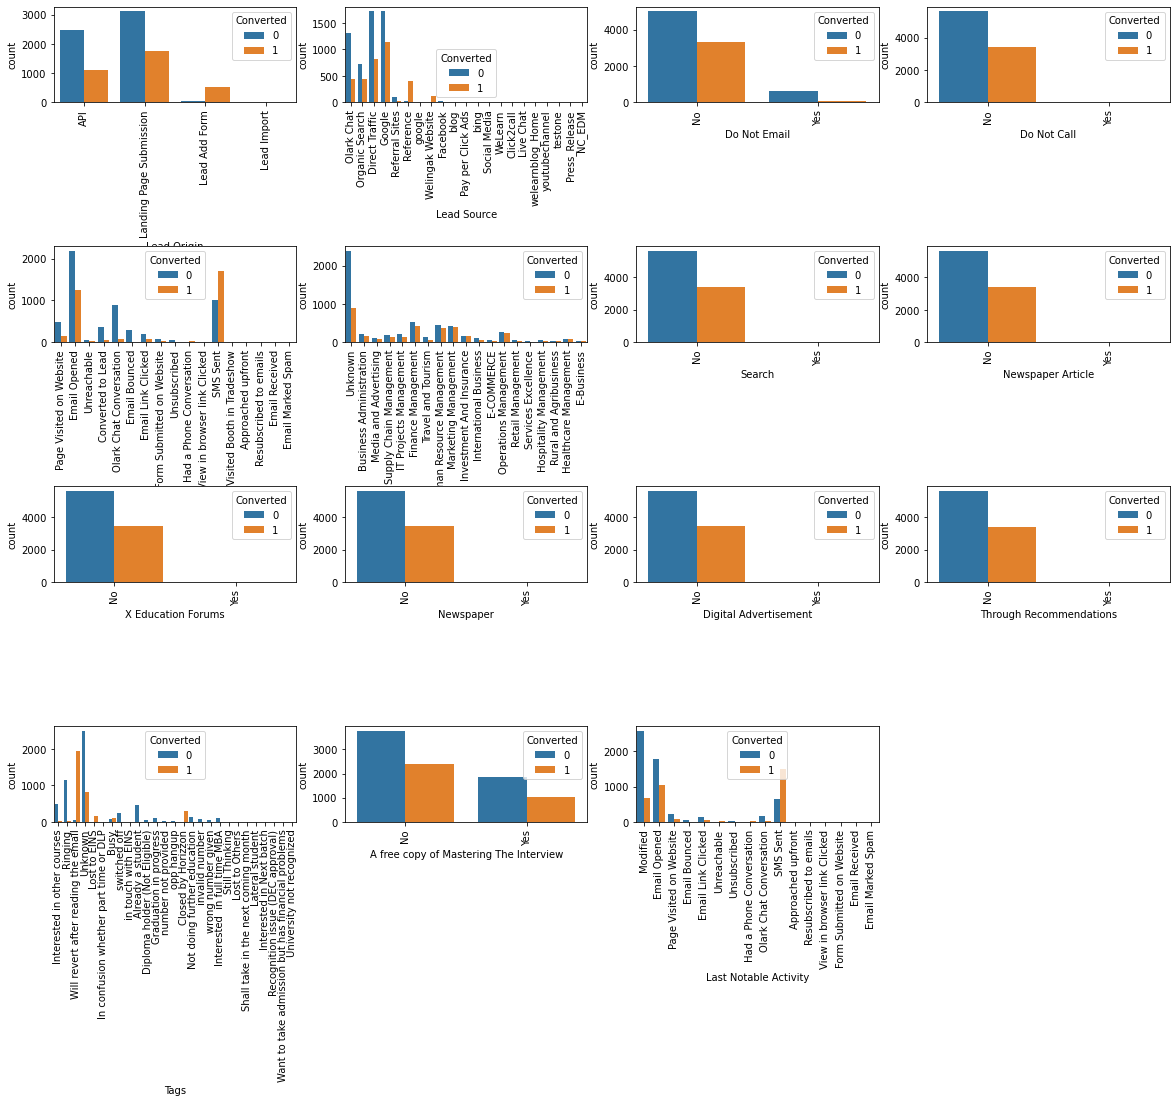

In [27]:
#Vizualizing the categorical columns
plt.figure(figsize=[20,15])
x=1
plt.subplots_adjust(hspace=1.5)
for i in cat_cols:
    plt.subplot(4,4,x)
    sns.countplot(data=leads_df,x=i,hue="Converted")
    plt.xticks(rotation='90')
    x=x+1
plt.show()



In [28]:
# Checking the categorical distributions
for i in cat_cols:
    print(leads_df[i].value_counts(normalize=True),"\n")

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64 

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Social Media         0.000220
Press_Release        0.000220
Live Chat            0.000220
blog                 0.000110
testone              0.000110
NC_EDM               0.000110
Pay per Click Ads    0.000110
youtubechannel       0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
Name: Lead Source, dtype: float64 

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64 

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64 

Email Opened       

From the above plots it's evident that the following columns don't have any variance and can be dropped:
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. X Education forms
6. Newspaper
7. Digital advertisement
8. Through Recommendations

In [29]:
#Dropping the required columns:
leads_df=leads_df.drop(['Do Not Email', 'Do Not Call',
       'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations'],axis=1)

## Analysing the numerical columns

In [30]:
num_cols=leads_df.select_dtypes(["int64","float64"]).columns

In [31]:
num_cols=num_cols.drop("Converted")
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Checking for outliers

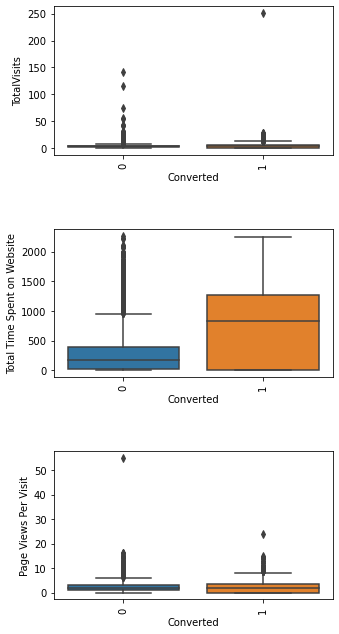

In [32]:
#Vizualizing the numerical columns
plt.figure(figsize=[5,15])
x=1
plt.subplots_adjust(hspace=0.5)
for i in num_cols:
    plt.subplot(4,1,x)
    sns.boxplot(data=leads_df,y=i,x="Converted")
    plt.xticks(rotation='90')
    x=x+1
plt.show()

From the above boxplots it's visible that the data has outliers and conversion rates are dependant on time spent on the website

In [33]:
leads_df[num_cols].describe(percentiles=[0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
50%       3.000000                   246.000000              2.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

The above data shows that there are clearly outleirs in the data above the 99th percentile and can be removed

### Removing the outliers

In [34]:
leads_df=leads_df[(leads_df["Total Time Spent on Website"]<=leads_df["Total Time Spent on Website"].quantile(0.99))&(leads_df["TotalVisits"]<=leads_df["TotalVisits"].quantile(0.99))&(leads_df["Page Views Per Visit"]<=leads_df["Page Views Per Visit"].quantile(0.99))]

In [35]:
#Checking the shape of the dataframe
leads_df.shape

(8836, 11)

In [36]:
leads_df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  8836.000000  8836.000000                  8836.000000   
mean      0.374717     3.138298                   464.593821   
std       0.484077     2.897787                   526.586843   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     5.000000   
50%       0.000000     3.000000                   237.000000   
75%       1.000000     5.000000                   885.000000   
max       1.000000    17.000000                  1839.000000   

       Page Views Per Visit  
count           8836.000000  
mean               2.264855  
std                1.893693  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max                9.000000

## Preparing the data for modelling

In [37]:
leads_df.nunique()

Lead Origin                                  4
Lead Source                                 21
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1631
Page Views Per Visit                        66
Last Activity                               17
Specialization                              19
Tags                                        27
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [38]:
leads_df.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization                                 Tags  \
0                  Unknown          Interested in other courses   
1                  Unknown                              Ringing   
2  Business Administration  Will revert after reading the email   
3    Media and Advertising                              Ringing   
4                  Unknown  Will revert after reading the email   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [39]:
# Creating binary mapping
leads_df["A free copy of Mastering The Interview"]=leads_df["A free copy of Mastering The Interview"].map(lambda x: 1 if x=="Yes" else 0)

In [40]:
cat_cols=cat_cols.drop(['Do Not Email', 'Do Not Call',
       'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',"A free copy of Mastering The Interview"])

In [41]:
#creating dummy variables
dummy=pd.get_dummies(leads_df[cat_cols],drop_first=True)

In [42]:
#Adding the dummy data to the leads dataframe
leads_df=pd.concat([leads_df,dummy],axis=1)

In [43]:
#Dropping the categorical columns
leads_df.drop(cat_cols,axis=1,inplace=True)

In [44]:
#Checking if all categorical variables are removed
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8836 entries, 0 to 9239
Columns: 103 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(3), uint8(98)
memory usage: 1.2 MB


In [45]:
#Checking the imbalance in data
leads_df.Converted.value_counts(normalize=True)

0    0.625283
1    0.374717
Name: Converted, dtype: float64

There is imbalance in data with only 37% converted but the data is good enough for modelling

### Checking for correlation

In [46]:
corr_df=leads_df.corr()

<AxesSubplot:>

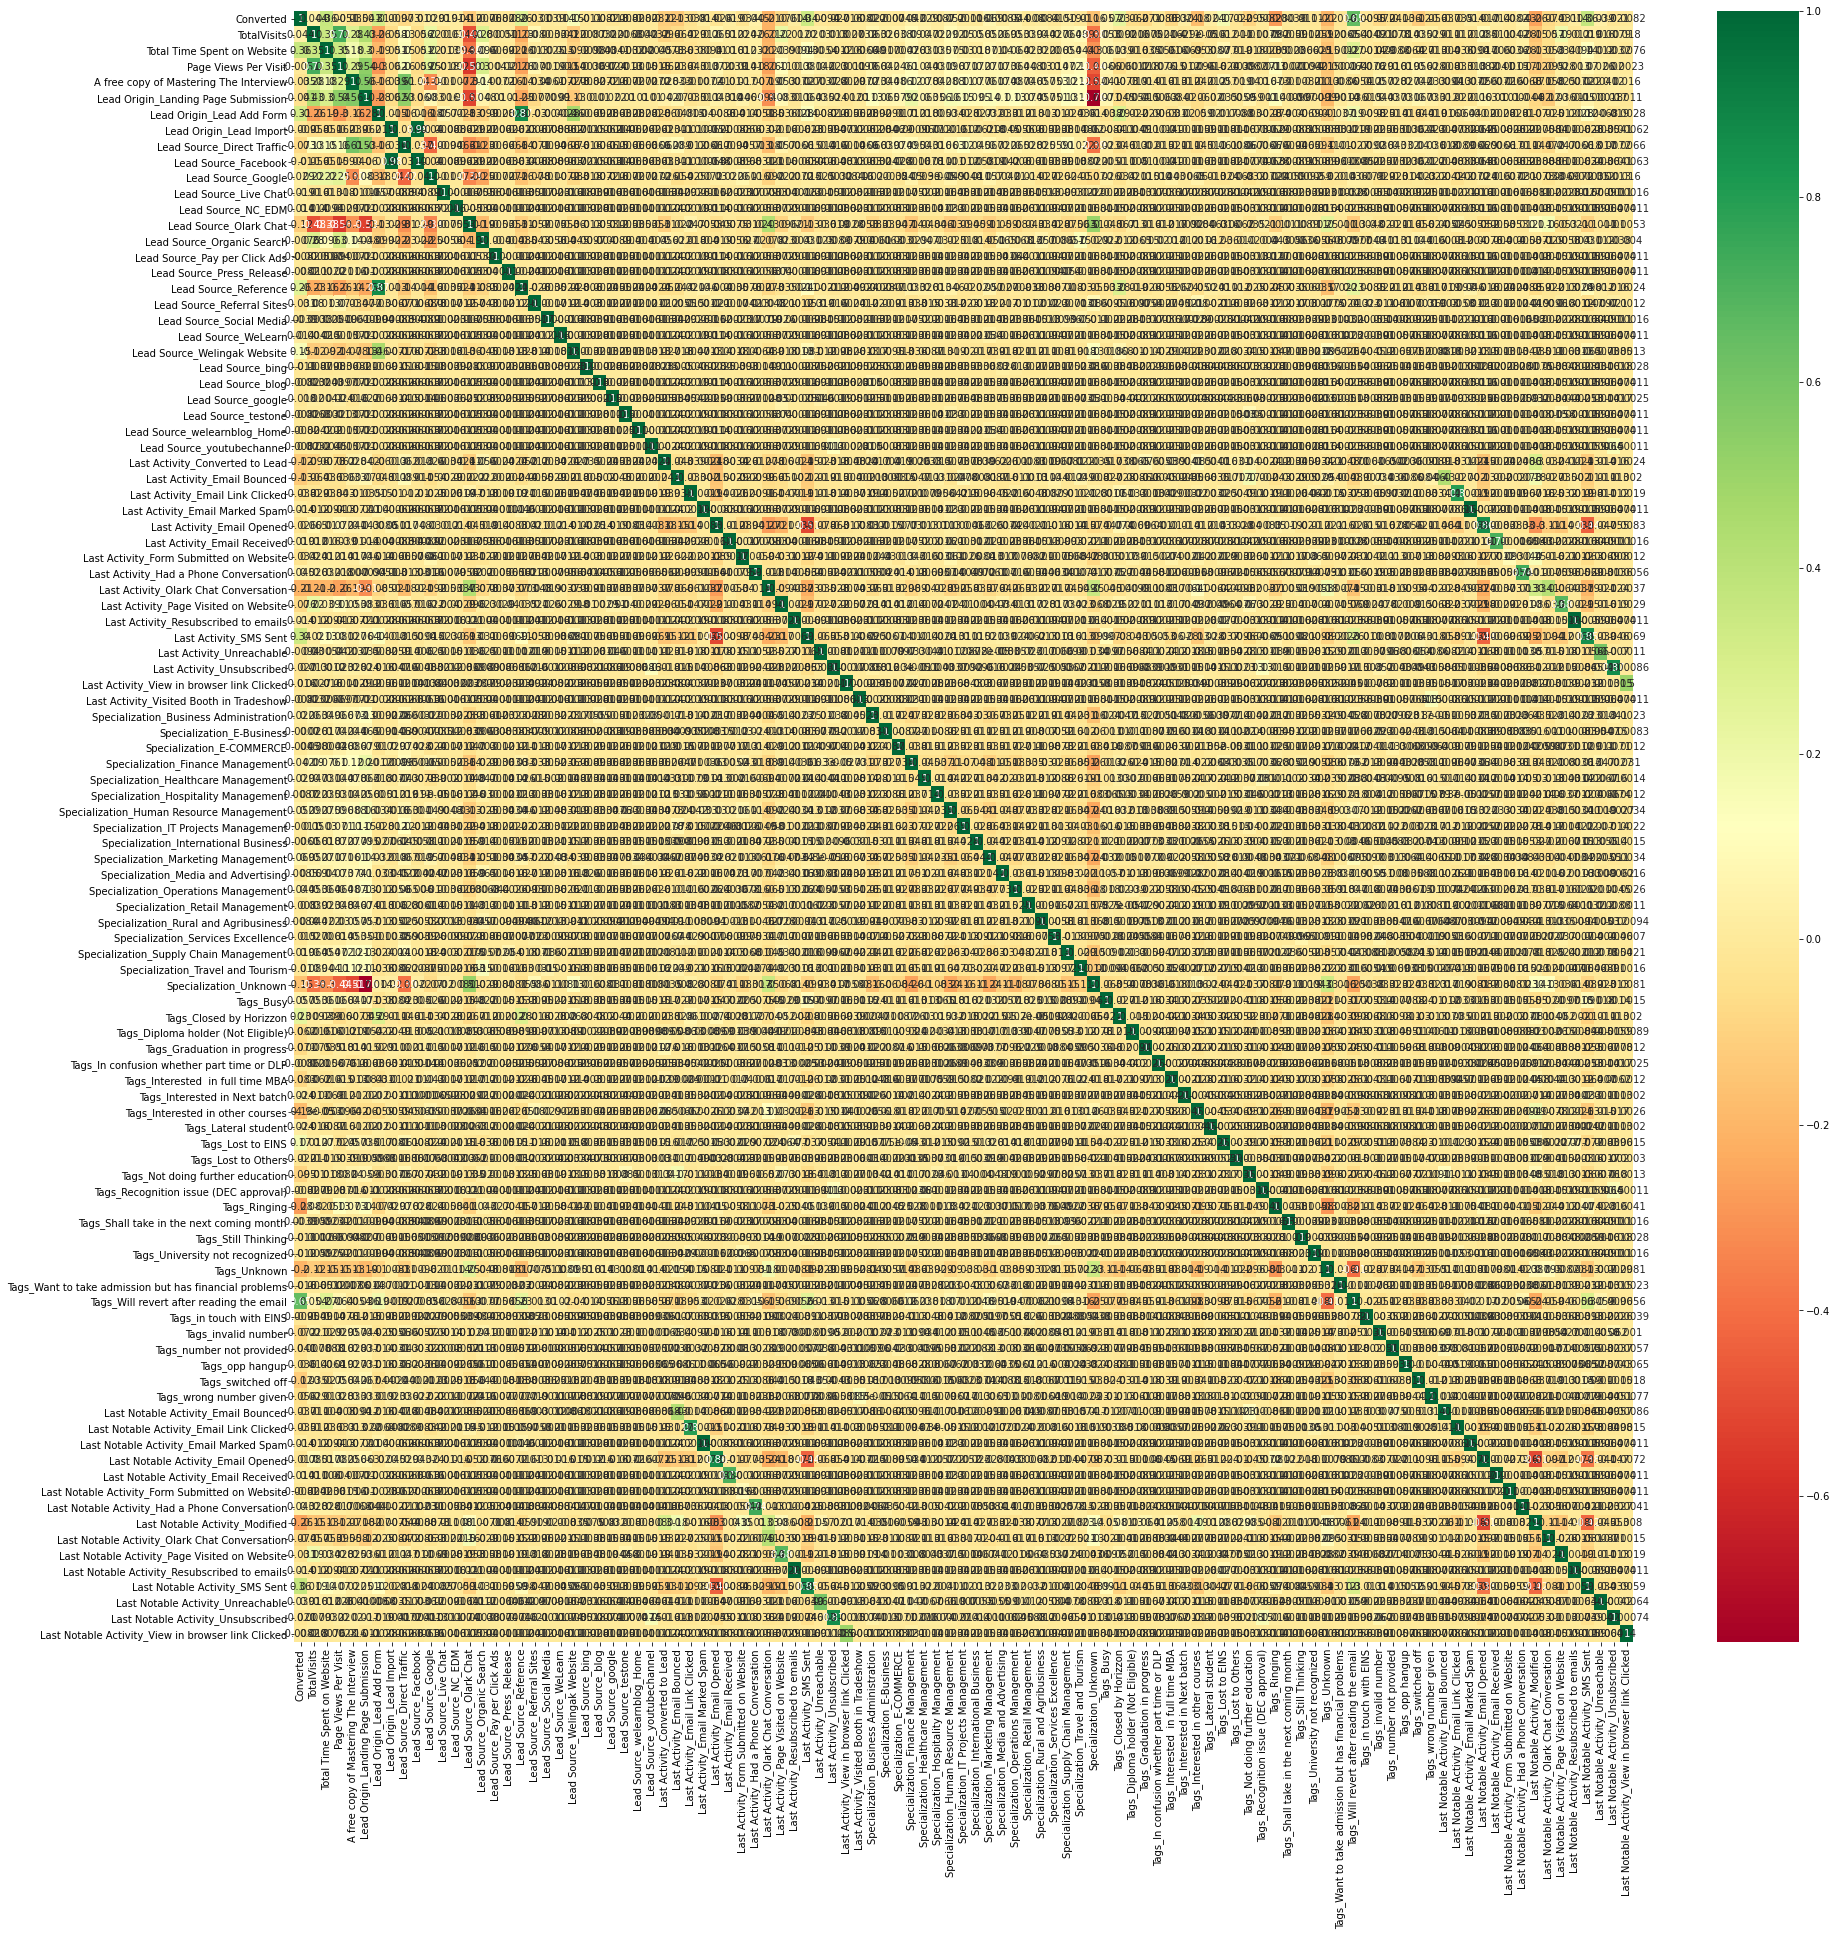

In [47]:
plt.figure(figsize=[30,30])
sns.heatmap(corr_df,cmap="RdYlGn",annot=True)

### Preparing train and test data

In [48]:
#importing libraries
from sklearn.model_selection import train_test_split

In [49]:
# Creating X and y 
X = leads_df.drop(["Converted"], axis=1)
y=leads_df["Converted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [50]:
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5024     0.117647                     0.588907              0.222222   
5651     0.352941                     0.161501              0.666667   
8875     0.176471                     0.003263              0.166667   
53       0.352941                     0.155519              0.166667   
1928     0.176471                     0.669386              0.166667   

      A free copy of Mastering The Interview  \
5024                                       1   
5651                                       0   
8875                                       0   
53                                         0   
1928                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5024                                    1                          0   
5651                                    1                          0   
8875                                    0                          0   
53                                      0                          0   
1928                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5024                        0                           1   
5651                        0                           0   
8875                        0                           0   
53                          0                           0   
1928                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
5024                     0                   0                      0   
5651                     0                   0                      0   
8875                     0                   1                      0   
53                       0                   1                      0   
1928                     0                   1                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
5024                   0                       0                           0   
5651                   0                       0                           1   
8875                   0                       0                           0   
53                     0                       0                           0   
1928                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
5024                              0                          0   
5651                              0                          0   
8875                              0                          0   
53                                0                          0   
1928                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
5024                      0                           0   
5651                      0                           0   
8875                      0                           0   
53                        0                           0   
1928                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
5024                         0                    0   
5651                         0                    0   
8875                         0                    0   
53                           0                    0   
1928                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
5024                             0                 0                 0   
5651                             0                 0                 0   
8875                             0                 0                 0   
53                               0                 0                 0   
1928                             0                 0                 0   

      Lead Source_google  Lead Sourc

In [52]:
round(X_train.describe(),2)

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count      6185.00                      6185.00               6185.00   
mean          0.19                         0.25                  0.26   
std           0.17                         0.29                  0.21   
min           0.00                         0.00                  0.00   
25%           0.06                         0.01                  0.11   
50%           0.18                         0.13                  0.22   
75%           0.29                         0.48                  0.33   
max           1.00                         1.00                  1.00   

       A free copy of Mastering The Interview  \
count                                 6185.00   
mean                                     0.31   
std                                      0.46   
min                                      0.00   
25%                                      0.00   
50%                                      0.00   
75%                                      1.00   
max                                      1.00   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                              6185.00                    6185.00   
mean                                  0.54                       0.06   
std                                   0.50                       0.24   
min                                   0.00                       0.00   
25%                                   0.00                       0.00   
50%                                   1.00                       0.00   
75%                                   1.00                       0.00   
max                                   1.00                       1.00   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count                  6185.00                     6185.00   
mean                      0.00                        0.28   
std                       0.05                        0.45   
min                       0.00                        0.00   
25%                       0.00                        0.00   
50%                       0.00                        0.00   
75%                       0.00                        1.00   
max                       1.00                        1.00   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
count               6185.00             6185.00                6185.00   
mean                   0.00                0.33                   0.00   
std                    0.05                0.47                   0.01   
min                    0.00                0.00                   0.00   
25%                    0.00                0.00                   0.00   
50%                    0.00                0.00                   0.00   
75%                    0.00                1.00                   0.00   
max                    1.00                1.00                   1.00   

       Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
count             6185.00                 6185.00                     6185.00   
mean                 0.00                    0.19                        0.12   
std                  0.01                    0.39                        0.32   
min                  0.00                    0.00                        0.00   
25%                  0.00                    0.00                        0.00   
50%                  0.00                    0.00                        0.00   
75%                  0.00                    0.00                        0.00   
max                  1.00                    1.00                        1.00   

       Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
count                        6185.00                    6185.00   
mean                            0.00                       0.00   
std                             0.01                       0.01   
min                      

### Feature Selection using RFE

In [53]:
#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [54]:
logreg = LogisticRegression()

In [55]:
# Currently we are selecting 20 features using RFE
rfe = RFE(logreg, 20).fit(X_train, y_train)

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 76),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 73),
 ('Lead Source_Press_Release', False, 72),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 40),
 ('Lead Source_Social Media', False, 74),
 ('Lead Source_WeLearn', False, 71),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 24),
 ('Lead Source_testone', F

In [57]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Building the Model

In [58]:
# Building the first model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6164
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.0
Date:                Sun, 13 Aug 2023   Deviance:                       2254.0
Time:                        13:53:09   Pearson chi2:                 7.88e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.4487      0.291    -22.196      0.000      -7.018      -5.879
Total Time Spent on Website                  4.0966      0.224     18.317      0.000       3.658       4.535
Lead Origin_Lead Add Form                    1.7366      0.483      3.598      0.000       0.791       2.683
Lead Source_Olark Chat                       1.4591      0.154      9.449      0.000       1.156       1.762
Lead Source_Welingak Website                 4.6834      1.134      4.130      0.000       2.461       6.906
Last Activity_Email Bounced                 -1.3174      0.580     -2.272      0.023      -2.454      -0.181
Last Activity_SMS Sent                       1.4147      0.231      6.122      0.000       0.962       1.868
Tags_Busy                                    2.6098      0.328      7.967      0.000       1.968       3.252
Tags_Closed by Horizzon                      9.5494      1.053      9.071      0.000       7.486      11.613
Tags_Lateral student                        28.6422   1.16e+05      0.000      1.000   -2.28e+05    2.28e+05
Tags_Lost to EINS                            9.2402      1.044      8.854      0.000       7.195      11.286
Tags_Ringing                                -1.2475      0.323     -3.865      0.000      -1.880      -0.615
Tags_Unknown                                 2.1534      0.245      8.807      0.000       1.674       2.633
Tags_Will revert after reading the email     6.8471      0.298     22.948      0.000       6.262       7.432
Tags_in touch with EINS                      3.0767      0.931      3.305      0.001       1.252       4.901
Tags_invalid number                        -22.6044   2.38e+04     -0.001      0.999   -4.66e+04    4.66e+04
Tags_switched off                           -1.9360      0.666     -2.906      0.004      -3.242      -0.630
Tags_wrong number given                    -23.0778   2.98e+04     -0.001      0.999   -5.85e+04    5.84e+04
Last Notable Activity_Email Opened           1.4910      0.151      9.852      0.000       1.194       1.788
Last Notable Activity_SMS Sent               2.4042      0.225     10.684      0.000       1.963       2.845
Last Notable Activity_Unreachable            2.2293      0.766      2.912      0.004       0.729       3.730
============================================================================================================
"""

In [59]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_SMS Sent  5.89
18            Last Notable Activity_SMS Sent  5.18
12  Tags_Will revert after reading the email  2.55
0                Total Time Spent on Website  2.26
11                              Tags_Unknown  2.21
17        Last Notable Activity_Email Opened  1.90
1                  Lead Origin_Lead Add Form  1.82
10                              Tags_Ringing  1.46
2                     Lead Source_Olark Chat  1.43
3               Lead Source_Welingak Website  1.37
7                    Tags_Closed by Horizzon  1.26
6                                  Tags_Busy  1.11
9                          Tags_Lost to EINS  1.08
15                         Tags_switched off  1.08
4                Last Activity_Email Bounced  1.07
14                       Tags_invalid number  1.03
16                   Tags_wrong number given  1.02
19         Last Notable Activity_Unreachable  1.02
8                       Tags_Lateral student  1.01
13                   Tags_in touch with EINS  1.01

In [60]:
#Dropping the column Tags_Lateral student as it has high p value
col=col.drop("Tags_Lateral student")

In [61]:
#Building the second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6165
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1135.2
Date:                Sun, 13 Aug 2023   Deviance:                       2270.4
Time:                        13:53:09   Pearson chi2:                 7.89e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.3157      0.279    -22.622      0.000      -6.863      -5.769
Total Time Spent on Website                  4.0725      0.222     18.318      0.000       3.637       4.508
Lead Origin_Lead Add Form                    1.8693      0.481      3.886      0.000       0.927       2.812
Lead Source_Olark Chat                       1.4666      0.154      9.526      0.000       1.165       1.768
Lead Source_Welingak Website                 4.5469      1.133      4.012      0.000       2.326       6.768
Last Activity_Email Bounced                 -1.3075      0.578     -2.263      0.024      -2.440      -0.175
Last Activity_SMS Sent                       1.4882      0.229      6.503      0.000       1.040       1.937
Tags_Busy                                    2.4710      0.319      7.750      0.000       1.846       3.096
Tags_Closed by Horizzon                      9.3717      1.047      8.950      0.000       7.319      11.424
Tags_Lost to EINS                            9.1023      1.041      8.746      0.000       7.062      11.142
Tags_Ringing                                -1.3833      0.314     -4.405      0.000      -1.999      -0.768
Tags_Unknown                                 2.0158      0.233      8.659      0.000       1.560       2.472
Tags_Will revert after reading the email     6.7045      0.287     23.321      0.000       6.141       7.268
Tags_in touch with EINS                      2.9391      0.925      3.176      0.001       1.125       4.753
Tags_invalid number                        -21.7374   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Tags_switched off                           -2.0666      0.662     -3.121      0.002      -3.364      -0.769
Tags_wrong number given                    -22.2058   1.81e+04     -0.001      0.999   -3.55e+04    3.54e+04
Last Notable Activity_Email Opened           1.4895      0.151      9.872      0.000       1.194       1.785
Last Notable Activity_SMS Sent               2.3392      0.222     10.523      0.000       1.903       2.775
Last Notable Activity_Unreachable            2.2362      0.765      2.922      0.003       0.736       3.736
============================================================================================================
"""

In [62]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_SMS Sent  5.86
17            Last Notable Activity_SMS Sent  5.17
11  Tags_Will revert after reading the email  2.55
0                Total Time Spent on Website  2.26
10                              Tags_Unknown  2.21
16        Last Notable Activity_Email Opened  1.90
1                  Lead Origin_Lead Add Form  1.81
9                               Tags_Ringing  1.46
2                     Lead Source_Olark Chat  1.43
3               Lead Source_Welingak Website  1.37
7                    Tags_Closed by Horizzon  1.26
6                                  Tags_Busy  1.11
8                          Tags_Lost to EINS  1.08
14                         Tags_switched off  1.08
4                Last Activity_Email Bounced  1.07
13                       Tags_invalid number  1.03
15                   Tags_wrong number given  1.02
18         Last Notable Activity_Unreachable  1.02
12                   Tags_in touch with EINS  1.01

In [63]:
#Dropping the column Tags_wrong number given 
col=col.drop("Tags_wrong number given")

In [64]:
#Building the third model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6166
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.6
Date:                Sun, 13 Aug 2023   Deviance:                       2277.2
Time:                        13:53:10   Pearson chi2:                 7.89e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.4396      0.281    -22.938      0.000      -6.990      -5.889
Total Time Spent on Website                  4.0698      0.222     18.329      0.000       3.635       4.505
Lead Origin_Lead Add Form                    1.8891      0.483      3.910      0.000       0.942       2.836
Lead Source_Olark Chat                       1.4711      0.154      9.563      0.000       1.170       1.773
Lead Source_Welingak Website                 4.5237      1.134      3.990      0.000       2.301       6.746
Last Activity_Email Bounced                 -1.3112      0.578     -2.270      0.023      -2.443      -0.179
Last Activity_SMS Sent                       1.4861      0.229      6.488      0.000       1.037       1.935
Tags_Busy                                    2.6120      0.318      8.224      0.000       1.990       3.235
Tags_Closed by Horizzon                      9.4899      1.047      9.060      0.000       7.437      11.543
Tags_Lost to EINS                            9.2262      1.041      8.862      0.000       7.186      11.267
Tags_Ringing                                -1.2343      0.312     -3.959      0.000      -1.845      -0.623
Tags_Unknown                                 2.1490      0.233      9.234      0.000       1.693       2.605
Tags_Will revert after reading the email     6.8309      0.288     23.692      0.000       6.266       7.396
Tags_in touch with EINS                      3.0648      0.925      3.312      0.001       1.251       4.878
Tags_invalid number                        -21.5897   1.44e+04     -0.001      0.999   -2.83e+04    2.83e+04
Tags_switched off                           -1.9152      0.661     -2.898      0.004      -3.210      -0.620
Last Notable Activity_Email Opened           1.4848      0.151      9.834      0.000       1.189       1.781
Last Notable Activity_SMS Sent               2.3109      0.222     10.424      0.000       1.876       2.745
Last Notable Activity_Unreachable            2.2266      0.765      2.912      0.004       0.728       3.725
============================================================================================================
"""

In [65]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_SMS Sent  5.84
16            Last Notable Activity_SMS Sent  5.17
11  Tags_Will revert after reading the email  2.53
0                Total Time Spent on Website  2.26
10                              Tags_Unknown  2.19
15        Last Notable Activity_Email Opened  1.89
1                  Lead Origin_Lead Add Form  1.81
9                               Tags_Ringing  1.45
2                     Lead Source_Olark Chat  1.43
3               Lead Source_Welingak Website  1.37
7                    Tags_Closed by Horizzon  1.26
6                                  Tags_Busy  1.11
8                          Tags_Lost to EINS  1.08
14                         Tags_switched off  1.08
4                Last Activity_Email Bounced  1.06
13                       Tags_invalid number  1.03
17         Last Notable Activity_Unreachable  1.02
12                   Tags_in touch with EINS  1.01

In [66]:
#Dropping the column Tags_invalid number 
col=col.drop("Tags_invalid number")

In [67]:
#Building the fourth model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1141.9
Date:                Sun, 13 Aug 2023   Deviance:                       2283.8
Time:                        13:53:10   Pearson chi2:                 7.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.5766      0.280    -23.465      0.000      -7.126      -6.027
Total Time Spent on Website                  4.0881      0.222     18.414      0.000       3.653       4.523
Lead Origin_Lead Add Form                    1.9137      0.486      3.941      0.000       0.962       2.866
Lead Source_Olark Chat                       1.4744      0.154      9.602      0.000       1.173       1.775
Lead Source_Welingak Website                 4.5016      1.135      3.967      0.000       2.278       6.726
Last Activity_Email Bounced                 -1.3163      0.578     -2.278      0.023      -2.449      -0.184
Last Activity_SMS Sent                       1.4840      0.229      6.469      0.000       1.034       1.934
Tags_Busy                                    2.7564      0.315      8.740      0.000       2.138       3.375
Tags_Closed by Horizzon                      9.6164      1.047      9.181      0.000       7.563      11.669
Tags_Lost to EINS                            9.3593      1.041      8.990      0.000       7.319      11.400
Tags_Ringing                                -1.0863      0.309     -3.516      0.000      -1.692      -0.481
Tags_Unknown                                 2.2879      0.231      9.906      0.000       1.835       2.741
Tags_Will revert after reading the email     6.9646      0.288     24.201      0.000       6.401       7.529
Tags_in touch with EINS                      3.1977      0.926      3.455      0.001       1.384       5.012
Tags_switched off                           -1.7650      0.659     -2.677      0.007      -3.057      -0.473
Last Notable Activity_Email Opened           1.4822      0.151      9.804      0.000       1.186       1.779
Last Notable Activity_SMS Sent               2.2875      0.221     10.330      0.000       1.854       2.722
Last Notable Activity_Unreachable            2.2204      0.764      2.904      0.004       0.722       3.719
============================================================================================================
"""

In [68]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                     Last Activity_SMS Sent  5.83
15            Last Notable Activity_SMS Sent  5.16
11  Tags_Will revert after reading the email  2.50
0                Total Time Spent on Website  2.25
10                              Tags_Unknown  2.16
14        Last Notable Activity_Email Opened  1.86
1                  Lead Origin_Lead Add Form  1.81
9                               Tags_Ringing  1.44
2                     Lead Source_Olark Chat  1.42
3               Lead Source_Welingak Website  1.37
7                    Tags_Closed by Horizzon  1.26
6                                  Tags_Busy  1.11
13                         Tags_switched off  1.08
8                          Tags_Lost to EINS  1.07
4                Last Activity_Email Bounced  1.06
16         Last Notable Activity_Unreachable  1.02
12                   Tags_in touch with EINS  1.01

In [69]:
#Dropping the column Last Activity_SMS Sent due to high VIF
col=col.drop("Last Activity_SMS Sent")

In [70]:
#Building the fifth model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1161.7
Date:                Sun, 13 Aug 2023   Deviance:                       2323.4
Time:                        13:53:10   Pearson chi2:                 8.27e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.2311      0.268    -23.275      0.000      -6.756      -5.706
Total Time Spent on Website                  4.0872      0.222     18.448      0.000       3.653       4.521
Lead Origin_Lead Add Form                    2.0470      0.466      4.389      0.000       1.133       2.961
Lead Source_Olark Chat                       1.3612      0.151      9.027      0.000       1.066       1.657
Lead Source_Welingak Website                 4.4394      1.124      3.950      0.000       2.237       6.642
Last Activity_Email Bounced                 -1.6515      0.569     -2.905      0.004      -2.766      -0.537
Tags_Busy                                    2.8593      0.315      9.075      0.000       2.242       3.477
Tags_Closed by Horizzon                      9.4100      1.042      9.027      0.000       7.367      11.453
Tags_Lost to EINS                            9.2842      1.039      8.935      0.000       7.248      11.321
Tags_Ringing                                -1.0469      0.308     -3.394      0.001      -1.651      -0.442
Tags_Unknown                                 2.3309      0.229     10.164      0.000       1.881       2.780
Tags_Will revert after reading the email     6.9173      0.283     24.417      0.000       6.362       7.473
Tags_in touch with EINS                      3.1969      0.949      3.368      0.001       1.337       5.057
Tags_switched off                           -1.7328      0.657     -2.636      0.008      -3.021      -0.444
Last Notable Activity_Email Opened           1.1344      0.134      8.452      0.000       0.871       1.397
Last Notable Activity_SMS Sent               3.4036      0.155     21.892      0.000       3.099       3.708
Last Notable Activity_Unreachable            1.8723      0.757      2.472      0.013       0.388       3.357
============================================================================================================
"""

In [71]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10  Tags_Will revert after reading the email  2.41
0                Total Time Spent on Website  2.24
9                               Tags_Unknown  2.02
14            Last Notable Activity_SMS Sent  1.95
1                  Lead Origin_Lead Add Form  1.80
13        Last Notable Activity_Email Opened  1.74
2                     Lead Source_Olark Chat  1.42
8                               Tags_Ringing  1.39
3               Lead Source_Welingak Website  1.37
6                    Tags_Closed by Horizzon  1.26
5                                  Tags_Busy  1.09
7                          Tags_Lost to EINS  1.07
12                         Tags_switched off  1.07
4                Last Activity_Email Bounced  1.05
15         Last Notable Activity_Unreachable  1.02
11                   Tags_in touch with EINS  1.00

All the columns have VIF lower than 5 and the model can be considered as significant


### Making predictions on the train set

In [72]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.18734124, 0.99142192, 0.02009718, ..., 0.32481723, 0.02330462,
       0.00268648])

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  LeadId
0          0        0.187341    5024
1          1        0.991422    5651
2          0        0.020097    8875
3          0        0.036807      53
4          1        0.968390    1928

### Drawing the ROC curve

In [74]:
#Importing metrics
from sklearn import metrics

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

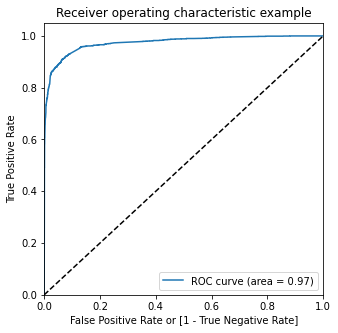

In [77]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The AUC for the ROC curve is 0.97 which shows that the model is significant

### Determining the optimal cut off point

In [78]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  LeadId  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.187341    5024    1    1    0    0    0    0    0    0   
1          1        0.991422    5651    1    1    1    1    1    1    1    1   
2          0        0.020097    8875    1    0    0    0    0    0    0    0   
3          0        0.036807      53    1    0    0    0    0    0    0    0   
4          1        0.968390    1928    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    1    1  
2    0    0  
3    0    0  
4    1    1

In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376071  1.000000  0.000000
0.1   0.1  0.865319  0.965176  0.805131
0.2   0.2  0.916572  0.931642  0.907489
0.3   0.3  0.923201  0.914875  0.928220
0.4   0.4  0.924495  0.896819  0.941176
0.5   0.5  0.927082  0.880911  0.954911
0.6   0.6  0.929992  0.865864  0.968645
0.7   0.7  0.928213  0.844798  0.978492
0.8   0.8  0.910590  0.785039  0.986266
0.9   0.9  0.893129  0.726139  0.993781


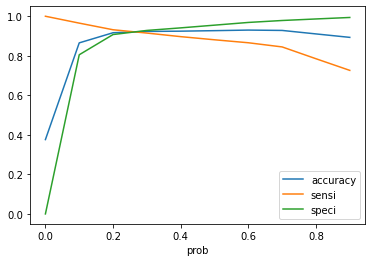

In [80]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision and recall curve

In [81]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

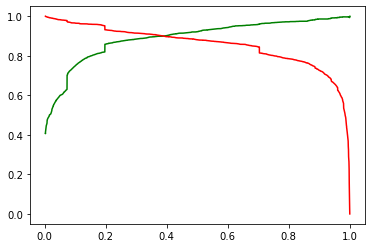

In [82]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The cut off point of 0.25 can be considered optimal

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

Converted  Converted_prob  LeadId  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.187341    5024    1    1    0    0    0    0    0    0   
1          1        0.991422    5651    1    1    1    1    1    1    1    1   
2          0        0.020097    8875    1    0    0    0    0    0    0    0   
3          0        0.036807      53    1    0    0    0    0    0    0    0   
4          1        0.968390    1928    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    1    1                1  
2    0    0                0  
3    0    0                0  
4    1    1                1

### Evaluating the model

In [84]:
#Checking overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9209377526273241

In [85]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3550,  309],
       [ 180, 2146]], dtype=int64)

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.9226139294926913

In [88]:
#specificity
TN / float(TN+FP)

0.9199274423425758

In [89]:
# false postive rate 
print(FP/ float(TN+FP))

0.0800725576574242


In [90]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8741344195519348


In [91]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9517426273458445


In [92]:
#Precision
print(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

0.8741344195519348


In [93]:
#Recall
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.9226139294926913


## Making Predictions on test data

In [94]:
#Scaling the test data 
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [95]:
#Selecting the final relevant columns
X_test=X_test[col]

In [96]:
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
5908                     0.000000                          0   
4014                     0.000000                          0   
4183                     0.060903                          0   
2746                     0.399130                          0   
3446                     0.516585                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
5908                       1                             0   
4014                       1                             0   
4183                       0                             0   
2746                       0                             0   
3446                       0                             0   

      Last Activity_Email Bounced  Tags_Busy  Tags_Closed by Horizzon  \
5908                            0          0                        0   
4014                            0          0                        0   
4183                            0          0                        0   
2746                            0          0                        1   
3446                            0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  Tags_Unknown  \
5908                  0             0             0   
4014                  0             0             0   
4183                  0             1             0   
2746                  0             0             0   
3446                  0             0             0   

      Tags_Will revert after reading the email  Tags_in touch with EINS  \
5908                                         0                        0   
4014                                         1                        0   
4183                                         0                        0   
2746                                         0                        0   
3446                                         1                        0   

      Tags_switched off  Last Notable Activity_Email Opened  \
5908                  0                                   0   
4014                  0                                   1   
4183                  0                                   0   
2746                  0                                   0   
3446                  0                                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
5908                               0                                  0  
4014                               0                                  0  
4183                               1                                  0  
2746                               0                                  0  
3446                               0                                  0

In [97]:
X_test_sm = sm.add_constant(X_test)

In [98]:
y_test_pred = result.predict(X_test_sm)

In [99]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [100]:
y_test_pred.head()

0
5908  0.007616
4014  0.960143
4183  0.025946
2746  0.991920
3446  0.942547

In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [104]:
y_test_pred_final.head()

Converted  LeadID         0
0          0    5908  0.007616
1          1    4014  0.960143
2          0    4183  0.025946
3          1    2746  0.991920
4          1    3446  0.942547

In [105]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [106]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [107]:
#Adding Lead score between 0 to 100 to identify hot leads
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map(lambda x: round(x*100))

In [108]:
y_test_pred_final.head()

Converted  LeadID  Converted_prob  final_predicted  Lead_Score
0          0    5908        0.007616                0           1
1          1    4014        0.960143                1          96
2          0    4183        0.025946                0           3
3          1    2746        0.991920                1          99
4          1    3446        0.942547                1          94

### Checking evaluating parameters on test dataset

In [109]:
#Accuracy
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.9200301772915881

In [110]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1542,  124],
       [  88,  897]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
#Sensitivity
TP / float(TP+FN)

0.9106598984771573

In [113]:
#specificity
TN / float(TN+FP)

0.9255702280912365

In [114]:
# false postive rate 
print(FP/ float(TN+FP))

0.0744297719087635


In [115]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8785504407443683


In [116]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9460122699386503


In [117]:
#Precision
print(precision_score(y_test_pred_final.Converted , y_test_pred_final.final_predicted))

0.8785504407443683


In [118]:
#Recall
print(recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

0.9106598984771573


#### Model Evaluation Parameters
Accuracy
- Train data: 92%
- Test Data: 92%

Sensitivity
- Train data: 92%
- Test Data: 91%

Specificity
- Train data: 92%
- Test Data: 93%

Precision
- Train data: 87%
- Test Data: 88%

Recall
- Train data: 92%
- Test Data: 91%

The sensitivity and specificity metrics show that the model is capable of predicting hot and cold leads >90% of the time, therefore we can say that the model is good and gives better expected results vs the CEO's expectation of 80% 

In [119]:
#Selecting the top variables
result.params.sort_values(ascending=False)

Tags_Closed by Horizzon                     9.410038
Tags_Lost to EINS                           9.284241
Tags_Will revert after reading the email    6.917303
Lead Source_Welingak Website                4.439422
Total Time Spent on Website                 4.087240
Last Notable Activity_SMS Sent              3.403627
Tags_in touch with EINS                     3.196907
Tags_Busy                                   2.859329
Tags_Unknown                                2.330883
Lead Origin_Lead Add Form                   2.046974
Last Notable Activity_Unreachable           1.872289
Lead Source_Olark Chat                      1.361175
Last Notable Activity_Email Opened          1.134393
Tags_Ringing                               -1.046918
Last Activity_Email Bounced                -1.651451
Tags_switched off                          -1.732751
const                                      -6.231092
dtype: float64

Tags, Lead source and Time spent on website are the most important variables to identify potential leads